In [1]:
%matplotlib inline


# Lasso and Elastic Net


Lasso and elastic net (L1 and L2 penalisation) implemented using a
coordinate descent.

The coefficients can be forced to be positive.



Automatically created module for IPython interactive environment
Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


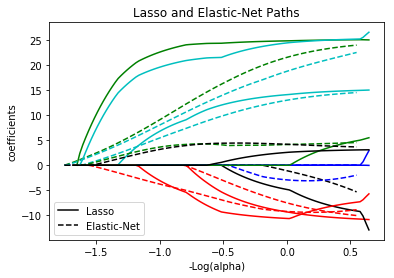

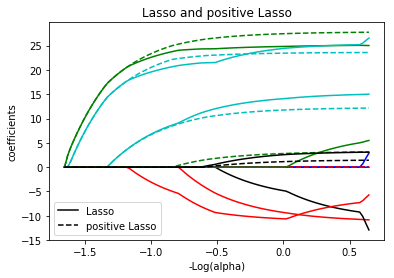

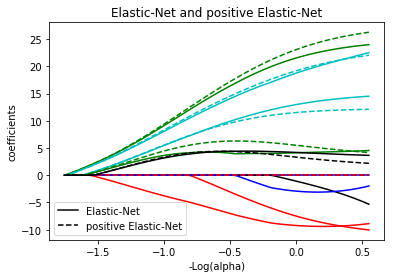

In [2]:
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)
print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps, positive=True, fit_intercept=False)


print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)
print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

# Display results

plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')


plt.figure(2)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
plt.axis('tight')


plt.figure(3)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
           loc='lower left')
plt.axis('tight')
plt.show()

In [3]:
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)

In [6]:
print(alphas_lasso)

[45.16003002 42.80667493 40.57595661 38.46148428 36.45720019 34.55736227
 32.75652768 31.0495372  29.43150049 27.89778204 26.44398789 25.06595308
 23.75972968 22.52157548 21.3479433  20.23547082 19.18097089 18.1814225
 17.23396203 16.33587511 15.48458881 14.67766429 13.91278978 13.18777399
 12.50053984 11.84911846 11.2316436  10.64634625 10.09154961  9.56566423
  9.0671835   8.59467933  8.14679805  7.72225651  7.31983845  6.93839098
  6.5768213   6.23409354  5.90922583  5.60128744  5.30939618  5.03271579
  4.77045363  4.52185832  4.28621769  4.06285662  3.85113524  3.65044696
  3.46021684  3.27989989  3.10897952  2.94696605  2.79339535  2.64782744
  2.50984529  2.37905359  2.25507763  2.13756224  2.02617076  1.92058404
  1.8204996   1.72563071  1.63570557  1.55046657  1.46966949  1.39308287
  1.32048729  1.25167477  1.18644817  1.12462062  1.066015    1.0104634
  0.95780668  0.90789398  0.8605823   0.8157361   0.7732269   0.73293291
  0.69473871  0.65853486  0.62421765  0.59168876  0.5

In [5]:
print(neg_log_alphas_lasso)

[-1.65475422 -1.63151149 -1.60826877 -1.58502604 -1.56178331 -1.53854059
 -1.51529786 -1.49205513 -1.4688124  -1.44556968 -1.42232695 -1.39908422
 -1.3758415  -1.35259877 -1.32935604 -1.30611331 -1.28287059 -1.25962786
 -1.23638513 -1.2131424  -1.18989968 -1.16665695 -1.14341422 -1.1201715
 -1.09692877 -1.07368604 -1.05044331 -1.02720059 -1.00395786 -0.98071513
 -0.95747241 -0.93422968 -0.91098695 -0.88774422 -0.8645015  -0.84125877
 -0.81801604 -0.79477331 -0.77153059 -0.74828786 -0.72504513 -0.70180241
 -0.67855968 -0.65531695 -0.63207422 -0.6088315  -0.58558877 -0.56234604
 -0.53910331 -0.51586059 -0.49261786 -0.46937513 -0.44613241 -0.42288968
 -0.39964695 -0.37640422 -0.3531615  -0.32991877 -0.30667604 -0.28343332
 -0.26019059 -0.23694786 -0.21370513 -0.19046241 -0.16721968 -0.14397695
 -0.12073422 -0.0974915  -0.07424877 -0.05100604 -0.02776332 -0.00452059
  0.01872214  0.04196487  0.06520759  0.08845032  0.11169305  0.13493577
  0.1581785   0.18142123  0.20466396  0.22790668  0.

In [ ]:
neg_log_alphas_enet = -np.log10(alphas_enet)

In [8]:
print(alphas_enet)

[56.45003753 53.50834367 50.71994577 48.07685535 45.57150024 43.19670284
 40.9456596  38.8119215  36.78937562 34.87222755 33.05498487 31.33244135
 29.6996621  28.15196935 26.68492913 25.29433852 23.97621362 22.72677812
 21.54245254 20.41984389 19.35573602 18.34708036 17.39098722 16.48471749
 15.6256748  14.81139807 14.0395545  13.30793282 12.61443701 11.95708029
 11.33397938 10.74334917 10.18349756  9.65282064  9.14979806  8.67298873
  8.22102662  7.79261693  7.38653228  7.0016093   6.63674522  6.29089474
  5.96306703  5.6523229   5.35777211  5.07857078  4.81391904  4.5630587
  4.32527105  4.09987486  3.88622439  3.68370757  3.49174419  3.3097843
  3.13730661  2.97381698  2.81884704  2.67195281  2.53271344  2.40073005
  2.2756245   2.15703839  2.04463197  1.93808321  1.83708687  1.74135359
  1.65060911  1.56459346  1.48306021  1.40577578  1.33251875  1.26307925
  1.19725835  1.13486747  1.07572787  1.01967012  0.96653362  0.91616614
  0.86842339  0.82316858  0.78027206  0.73961095  0.7

In [9]:
print(neg_log_alphas_enet)

[-1.75166423 -1.72842151 -1.70517878 -1.68193605 -1.65869333 -1.6354506
 -1.61220787 -1.58896514 -1.56572242 -1.54247969 -1.51923696 -1.49599424
 -1.47275151 -1.44950878 -1.42626605 -1.40302333 -1.3797806  -1.35653787
 -1.33329514 -1.31005242 -1.28680969 -1.26356696 -1.24032424 -1.21708151
 -1.19383878 -1.17059605 -1.14735333 -1.1241106  -1.10086787 -1.07762515
 -1.05438242 -1.03113969 -1.00789696 -0.98465424 -0.96141151 -0.93816878
 -0.91492605 -0.89168333 -0.8684406  -0.84519787 -0.82195515 -0.79871242
 -0.77546969 -0.75222696 -0.72898424 -0.70574151 -0.68249878 -0.65925606
 -0.63601333 -0.6127706  -0.58952787 -0.56628515 -0.54304242 -0.51979969
 -0.49655696 -0.47331424 -0.45007151 -0.42682878 -0.40358606 -0.38034333
 -0.3571006  -0.33385787 -0.31061515 -0.28737242 -0.26412969 -0.24088697
 -0.21764424 -0.19440151 -0.17115878 -0.14791606 -0.12467333 -0.1014306
 -0.07818787 -0.05494515 -0.03170242 -0.00845969  0.01478303  0.03802576
  0.06126849  0.08451122  0.10775394  0.13099667  0.1

In [20]:
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    print (c)
    print(len(coef_e))
    print(coef_e)
    print(alphas_enet)
    print(a)

b
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. -0. -0. -0. -0. -0.]
[56.45003753 53.50834367 50.71994577 48.07685535 45.57150024 43.19670284
 40.9456596  38.8119215  36.78937562 34.87222755 33.05498487 31.33244135
 29.6996621  28.15196935 26.68492913 25.29433852 23.97621362 22.72677812
 21.54245254 20.41984389 19.35573602 18.34708036 17.39098722 16.48471749
 15.6256748  14.81139807 14.0395545  13.30793282 12.61443701 11.95708029
 11.33397938 10.74334917 10.18349756  9.65282064  9.14979806  8.67298873
  8.22102662  7.79261693  7.38653228  7.0016093   6.63674522  6.29089474
  5.96306703  5.6523229   5.35777211  5.07857078  4.81391904  4.5630587
  4.3252